In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import os
import glob

plt.close('all')
plt.rcParams.update({
  'figure.max_open_warning': 0,
  'text.usetex':             True,
  'figure.autolayout':       True,
  'font.family':             "STIXGeneral",
  'mathtext.fontset':        "stix",
  'font.size':              10,
  'axes.titlesize':         10,
  'figure.labelsize':       10,
  'figure.titlesize':       10,
  'legend.fontsize':        10,
  'legend.handlelength':     1,
  'legend.handletextpad':    0.5,
  'legend.borderpad':        0.5,
  'legend.borderaxespad':    0.5,
  'legend.columnspacing':    1,
  'legend.framealpha':       1,
  'legend.fancybox':         True,
  'axes.grid':               True,
  'axes.grid.axis':          'both',
  'grid.alpha':              0.2,
  'grid.linewidth':          0.4,
  'xtick.labelsize':        10,
  'ytick.labelsize':        10,
  'lines.linewidth':         1,
  'lines.markersize':        5,
  'savefig.transparent':     True,
  'savefig.pad_inches':      0.01,
  'savefig.format':          'pdf',
  'savefig.bbox':            'tight'
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

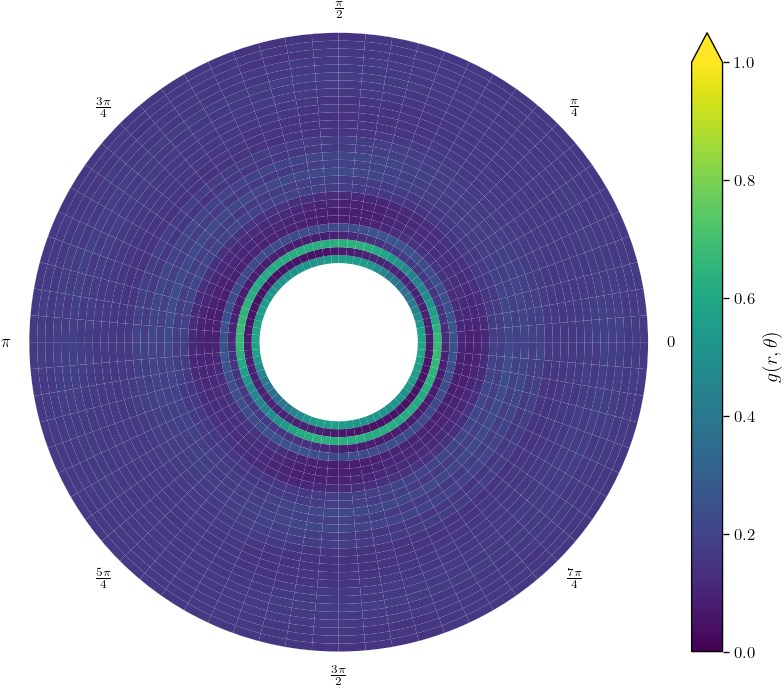

In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

topDir      = "/Volumes/Rahul_2TB/high_bidispersity/"

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.74]

ar          = [1.4]

for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1]) > 2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname = topDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range(run[NP[i]]):
                    
                    datFile   = glob.glob(f'{dataname}/run_{l+1}/PDF_*txt')[0]
                    rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
                    thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
                    g_r_theta = np.genfromtxt(datFile, skip_header=5)
                    
                    fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, figsize=(8,6), dpi = 120)
                    ax.grid(False)

                    for i in range(len(rbin) - 1):
                        for j in range(len(thetabin) - 1):
                            theta_start = np.degrees(thetabin[j])
                            theta_end = np.degrees(thetabin[j + 1])
                            r_start = rbin[i]
                            r_end = rbin[i + 1]

                            wedge = Wedge(
                                (0, 0), r_end, theta_start, theta_end,
                                width=r_end - r_start,
                                facecolor=plt.cm.viridis(g_r_theta[i, j]),
                                edgecolor='none',  # Remove the black borders
                                #antialiased=False,
                                transform=ax.transData._b
                            )
                            ax.add_patch(wedge)

                    ax.set_ylim(0, rbin[-150])
                    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1)) #norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
                    sm.set_array([])
                    cbar = fig.colorbar(sm, ax=ax, fraction=0.0455, pad=0.05, extend='max')  # Increase 'pad' to move the colorbar to the right
                    cbar.set_label(r'$g(r,\theta)$', fontsize=12)  
                    ticks = np.arange(0, 2 * np.pi, np.pi/4)  # Define ticks from 0 to 2π every π/4 radians
                    ax.set_xticks(ticks)  # Set the angular ticks

                    # Label ticks in terms of pi
                    angle_labels = [r'0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$',
                                    r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
                    ax.set_xticklabels(angle_labels)
                    ax.set_yticklabels([])
                    ax.spines['polar'].set_visible(False)

                    plt.show()

/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_2553/2678620701.py:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcolor2 = ax2.pcolormesh(rgridtheta*np.cos(thetagrid), rgridtheta*np.sin(thetagrid), g_r_theta[0:-150,:].transpose(), cmap='viridis')


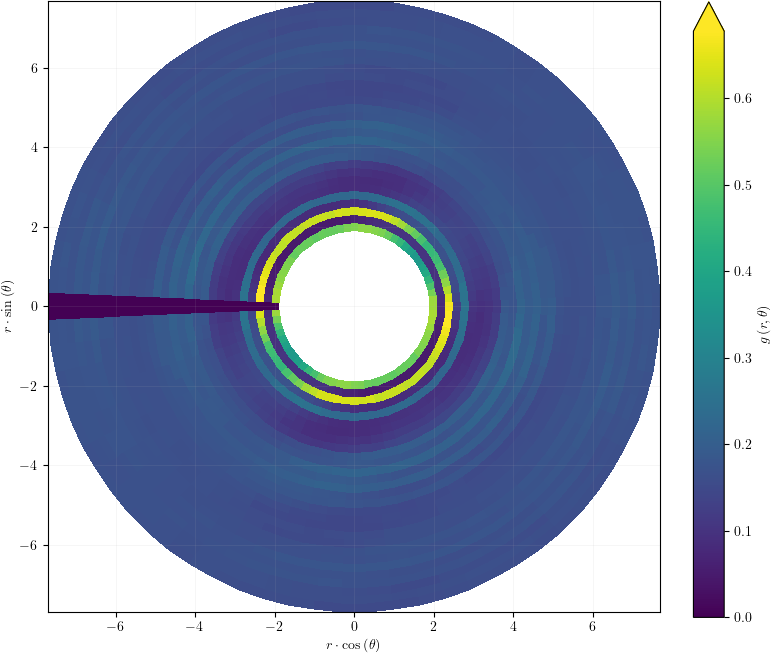

In [13]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Simulation parameters.
topDir      = "/Volumes/Rahul_2TB/high_bidispersity/"

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.74]

ar          = [1.4]

for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1]) > 2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname = topDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range(run[NP[i]]):
                    
                    datFile   = glob.glob(f'{dataname}/run_{l+1}/PDF_*txt')[0]
                    rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
                    thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
                    g_r_theta = np.genfromtxt(datFile, skip_header=5)
                    
                    rgridtheta, thetagrid = np.meshgrid(rbin[0:-150], thetabin)
                    
                    fig2, ax2 = plt.subplots(1,1, figsize=(8,8))
                    ax2.set_xlabel(r"$r \cdot \rm{cos}\left(\theta\right)$")
                    ax2.set_ylabel(r"$r \cdot \rm{sin}\left(\theta\right)$")
                    ax2.set_aspect('equal')
                    pcolor2 = ax2.pcolormesh(rgridtheta*np.cos(thetagrid), rgridtheta*np.sin(thetagrid), g_r_theta[0:-150,:].transpose(), cmap='viridis')
                    cbar2 = fig2.colorbar(pcolor2, fraction=0.0455, extend='max')
                    cbar2.set_label(r"$g\left(r,\theta\right)$")

plt.show()

In [8]:
rgridtheta.shape

(73, 79)

In [11]:
g_r_theta[0:-100,:].shape

(79, 73)

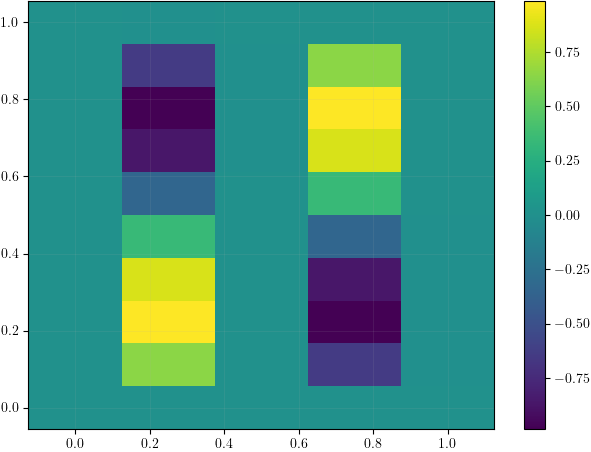

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X * 2 * np.pi) * np.sin(Y * 2 * np.pi)

fig, ax2 = plt.subplots()
c = ax2.pcolormesh(X, Y, Z, cmap='viridis')
fig.colorbar(c)
plt.show()

In [28]:
X,Y

(array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
        [0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444],
        [0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556],
        [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778],
        [0.88888889, 0.88888889, 0.888

In [30]:
Y.shape

(10, 5)

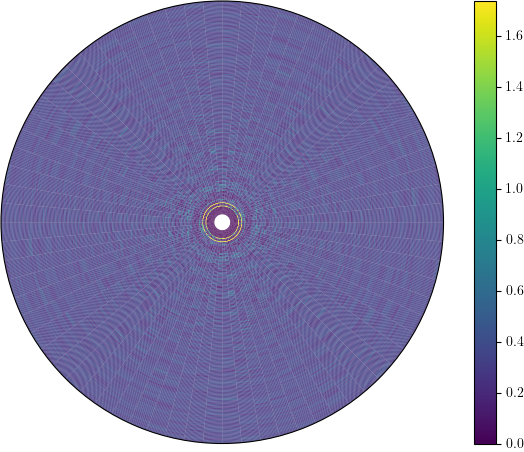

In [69]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Wedge

# # Simulation parameters.
# topDir      = "/Volumes/Rahul_2TB/high_bidispersity/"

# NP          = [1000]

# run         = {500:8,1000:1,2000:2,4000:1}

# phi         = [0.74]

# ar          = [1.4]

# for i in range(len(NP)):
#     for j in range(len(phi)):
#         phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
#         for k in range(len(ar)):
#             dataname = topDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
#             if os.path.exists(dataname):
#                 for l in range(run[NP[i]]):
                    
#                     datFile   = glob.glob(f'{dataname}/run_{l+1}/PDF_*txt')[0]
#                     rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
#                     thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
#                     g_r_theta = np.genfromtxt(datFile, skip_header=5)
                    
                    
#                     # Create the radial plot
                    
                    
#                     fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#                     ax.grid(False)

#                     # Plot the data using wedges
#                     for i in range(len(rbin) - 1):
#                         for j in range(len(thetabin) - 1):
#                             theta_start = np.degrees(thetabin[j])
#                             theta_end = np.degrees(thetabin[j + 1])
#                             r_start = rbin[i]
#                             r_end = rbin[i + 1]

#                             # Convert radial bins to degrees for width
#                             wedge = Wedge(
#                                 (0, 0), r_end, theta_start, theta_end,
#                                 width=r_end - r_start,
#                                 facecolor=plt.cm.viridis(g_r_theta[i, j]),
#                                 edgecolor=None,  # Remove the black borders
#                                 transform=ax.transData._b
#                             )
#                             ax.add_patch(wedge)

#                     # Set the radial limits
#                     ax.set_ylim(0, rbin[-100])

#                     # Add a color bar
#                     sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
#                     sm.set_array([])
#                     fig.colorbar(sm, ax=ax)

#                     # Customize the plot
#                     ax.set_xticks([])  # Turn off xticks
#                     ax.set_yticklabels([])

#                     plt.show()

In [49]:
import os
import numpy as np 
import glob
from tqdm import tqdm
import sys

'''
Aug 15, 2024
RVP

This script calculates the pair distribution function for a particular case
'''

# Simulation data mount point
#topDir      = "/Volumes/Rahul_2TB/high_bidispersity/"
topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

# Simulation parameters.
NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.74]

ar          = [1.4]

# PDF parameters
dtheta = 5    # in degrees
dr     = 0.2  # in unit length
off    = 100  # no. of timesteps to skip for steady state

def parametersList(ParametersFile):
    '''
    This function reads the parameters file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: ParametersFile - the location of the parameters data file
    '''

    parFile = open(ParametersFile, 'r')

    hashCounter = 0
    temp        = []
    parList     = [] # list with parameters parameters for each element at each timestep

    fileLines = parFile.readlines()[22:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                parList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    parFile.close()
    return parList

"====================================================================================================================================="

contType = 'll'

for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname = topDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[i]]):
                    ranSeedFile = glob.glob(f'{dataname}/run_{l+1}/random_*.dat')[0] #"random_seed.dat"
                    datFile     = glob.glob(f'{dataname}/run_{l+1}/data_*')[0]
                    parFile     = glob.glob(f'{dataname}/run_{l+1}/par_*')[0]

                    particleSize = np.genfromtxt(ranSeedFile, skip_header=2, usecols=-1)
                    parList      = parametersList(parFile)

                    # Box dimensions
                    lx = np.genfromtxt(datFile, skip_header=3, max_rows=1, comments = '_')[2]
                    lz = np.genfromtxt(datFile, skip_header=5, max_rows=1, comments = '_')[2]

                    # Reading simulation results
                    _, gamma, _, _,  _, _, _, _, _, _, \
                    _, _, _, minGap, _, _, _, _, _, _,       \
                    _, _, _, _,  _, _, _, _, _, _            \
                    = np.loadtxt(datFile, skiprows=37).transpose()

                    # Bin parameters
                    dtheta   *= np.pi/180  # converting to radians
                    #rmin      = np.min(particleSize) + np.min(minGap)
                    rmin      = (np.max(particleSize) + np.min(minGap) if contType == 'll' else np.min(particleSize) + np.min(minGap))
                    rmax      = np.max([lx,lz])/2.
                    rbin      = np.arange(rmin,   rmax + dr,      dr)
                    thetabin  = np.arange(-np.pi, np.pi + dtheta, dtheta)

                    g_r_theta = np.zeros((len(rbin), len(thetabin)))
                    
                    SSi = parList[off:off+10]
                    
                    #with tqdm(enumerate(SSi), desc="Progress", ncols=100, total=len(SSi), leave=False) as progress_bar:
                        #for ii, mat in progress_bar:
                    #for _ in tqdm(range(len(SSi)), desc="Progress", leave=False):
                        #for ii, mat in enumerate(SSi):  
                    for idx, (ii, mat) in tqdm(enumerate(enumerate(SSi)), desc="Progress", leave=False, total=len(SSi)):
                        xp = mat[:,2]
                        zp = mat[:,3]

                        if contType == 'ss':
                            cond1 = (mat[:,1] == 1) # small particle condition
                            xp,zp = xp[cond1], zp[cond1]

                        if contType == 'll':
                            cond1 = (mat[:,1] > 1) # small particle condition
                            xp,zp = xp[cond1], zp[cond1]

                        xmat, zmat = np.outer(xp, np.ones(len(xp))), np.outer(zp, np.ones(len(xp)))
                        dxij, dzij = xmat.transpose() - xmat,      zmat.transpose() - zmat

                        # Lees Edwards boundary:
                        dxij[dzij > lz/2.]  -= gamma[ii]*lx
                        dzij[dzij > lz/2.]  -= lz

                        dxij[dzij < -lz/2.] += gamma[ii]*lx
                        dzij[dzij < -lz/2.] += lz

                        # X peridodic:
                        dxij[dxij >  lx/2.] -= lx
                        dxij[dxij < -lx/2.] += lx

                        dij = np.sqrt(dxij**2 + dzij**2) # Abosulte distance btw each pair
                        tij = np.arctan2(dzij, dxij)     # Angle btw each pair

                        dij1 = np.zeros([1000,1000])

                        if contType == 'sl':
                            for im in range(dij.shape[0]):
                                for ikk in range(dij.shape[1]):
                                    cond2 = (mat[im,1] != mat[ikk,1])
                                    dij1[im, ikk] = cond2
                            dij *= dij1

                        #del xp, zp, xmat, zmat, dxij, dzij

                        for ij in range(len(rbin[0:-1])):
                            condr = np.logical_and(dij >= rbin[ij], dij < (rbin[ij] + dr))
                            t1ij  = tij[condr]
                            theta_surf = (dtheta/2) * (2*rbin[ij]*dr + dr**2) #different from michel's code
                            for ik in range(len(thetabin[0:-1])):
                                condnt = np.logical_and(t1ij >= thetabin[ik], t1ij < (thetabin[ik] + dtheta))
                                g_r_theta[ij, ik] += np.sum(condnt)/NP[i]/theta_surf

                        #sys.stdout.write("\r" + " " * 100)  # Clear the line
                        #sys.stdout.flush()

                    g_r_theta /= len(SSi)
#                     txtFile = open(f'{dataname}/run_{l+1}/' + 'PDF_g_r_theta.txt', 'w')

#                     txtFile.write('# r bins \n')
#                     txtFile.write(" ".join(map(str, rbin)))
#                     txtFile.write("\n\n")

#                     txtFile.write('# theta bins \n')
#                     txtFile.write(" ".join(map(str, thetabin)))
#                     txtFile.write("\n\n")

#                     txtFile.write("\n".join(" ".join(map(str, row)) for row in g_r_theta) + "\n")
#                     txtFile.close()
                    #progress_bar.clear()
                    print(f'\n    Done - NP_{str(NP[i])}/phi_{phir}/ar_{str(ar[k])}/run_{l+1}')
            else:
                print(f'{dataname} - Not found')


    Done - NP_1000/phi_0.74/ar_1.4/run_1


In [53]:
sizePair='ss'
f'{dataname}/PDF_{sizePair}_g_r_theta.txt'

'/media/rahul/Rahul_2TB/high_bidispersity/NP_1000/phi_0.74/ar_1.4/Vr_0.5/PDF_ss_g_r_theta.txt'

In [57]:
sizePairs   = ['all', 'ss', 'sl', 'll']
sizePair='all'
bottomDet = ['All Particles', 'Small-Small Particles', 'Small-large Particles', 'Large-Large Particles']
f'{bottomDet[sizePairs.index(sizePair)]}'

'All Particles'

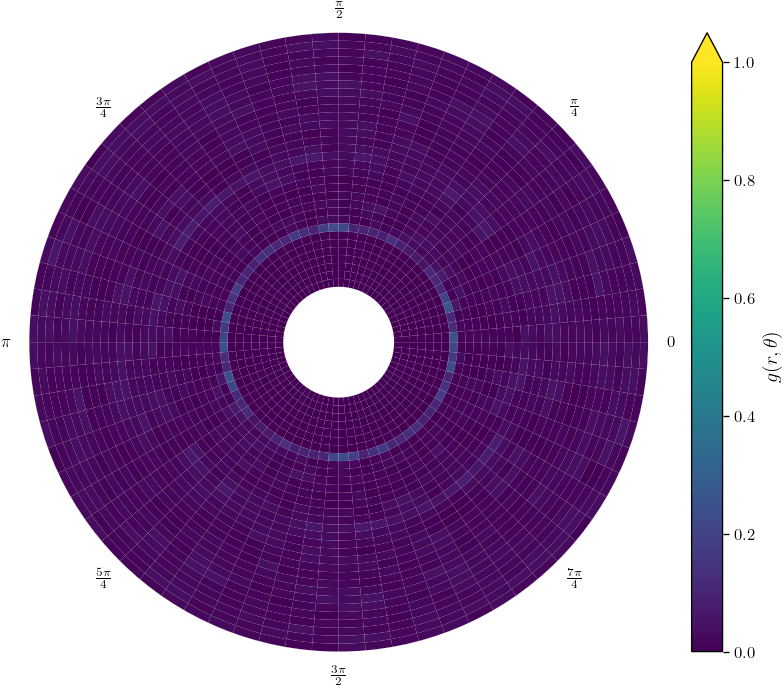

In [50]:
from matplotlib.patches import Wedge

fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, figsize=(8,6), dpi = 120)
ax.grid(False)

for i in range(len(rbin) - 1):
    for j in range(len(thetabin) - 1):
        theta_start = np.degrees(thetabin[j])
        theta_end = np.degrees(thetabin[j + 1])
        r_start = rbin[i]
        r_end = rbin[i + 1]

        wedge = Wedge(
            (0, 0), r_end, theta_start, theta_end,
            width=r_end - r_start,
            facecolor=plt.cm.viridis(g_r_theta[i, j]),
            edgecolor='none',  # Remove the black borders
            #antialiased=False,
            transform=ax.transData._b
        )
        ax.add_patch(wedge)

ax.set_ylim(0, rbin[-150])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1)) #norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.0455, pad=0.05, extend='max')  # Increase 'pad' to move the colorbar to the right
cbar.set_label(r'$g(r,\theta)$', fontsize=12)  
ticks = np.arange(0, 2 * np.pi, np.pi/4)  # Define ticks from 0 to 2π every π/4 radians
ax.set_xticks(ticks)  # Set the angular ticks

# Label ticks in terms of pi
angle_labels = [r'0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$',
                r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
ax.set_xticklabels(angle_labels)
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

plt.show()

In [30]:
phi=0.74
phir = '{:.3f}'.format(phi) if len(str(phi).split('.')[1])>2 else '{:.2f}'.format(phi)
dataname = f'{topDir}NP_{1000}/phi_{phir}/ar_{1.4}/Vr_0.5/run_{1+1}'
dataname

'/media/rahul/Rahul_2TB/high_bidispersity/NP_1000/phi_0.74/ar_1.4/Vr_0.5/run_2'

In [21]:
rbin[30]/lz

0.09330158322253529

In [46]:
from tqdm import tqdm
import time

# Example usage with a loop
# List1 is a list of arrays
with tqdm(enumerate(List1), desc="Progress", ncols=100, total=len(List1)) as progress_bar:
    for ii, mat in progress_bar:
        # Simulate some work with sleep
        time.sleep(0.1)
    progress_bar.clear()  # Clear the progress bar

print('Done')


NameError: name 'List1' is not defined